In [17]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Part I

In [317]:
font = {'size':12, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [184]:
with open("data/usca312_dist.txt") as f:
    D = numpy.array(f.read().split(), dtype=float).reshape(312, 312)

In [332]:
def MDS(D, N):
    """
    Implementing the MDS method
    
    D: distances matrix
    N: Number of points in the data
    """
    Cm = np.identity(N)  - 1./N
    B = -0.5*dot(Cm.T, dot(D**2, Cm))
    eigvals, eigvec = linalg.eig(B)
    E = eigvec[:,:2].real
    L = np.zeros([2,2])
    L[0][0] = eigvals[0].real
    L[1][1] = eigvals[1].real
    X = dot(E, np.sqrt(np.abs(L)))
    return X

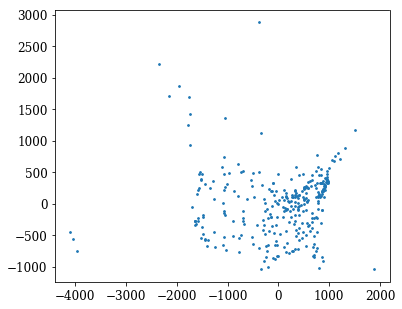

In [359]:
figure(figsize=(6,5))
scatter(X[:,0], -X[:,1], s=3)
#xlabel('$$')

# Part II

## 1.

In [329]:
with open("data/training.txt") as f:
    SM = numpy.array(f.read().split(), dtype=float).reshape(250, 250)

In [331]:
colors=np.loadtxt('data/training_ys.txt')

In [356]:
index_c1 = where(colors==10)
index_c2 = where(colors==5)

In [334]:
x2 = MDS(SM, 250)

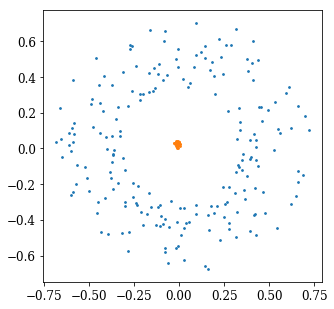

In [357]:
figure(figsize=(5,5))

scatter(x2[index_c1,0], -x2[index_c1,1], s=3)
scatter(x2[index_c2,0], -x2[index_c2,1], s=3)


## 3.